# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])


In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")


Total articles about Bitcoin: 4725


In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")


Total articles about Ethereum: 1303


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,Compound,Positive,Negative,Neutral,Text
0,-0.6705,0.064,0.199,0.737,A former Microsoft software engineer from Ukra...
1,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...
2,0.2144,0.053,0.000,0.947,PayPal is bringing its newly-announced support...
3,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,..."
4,0.0000,0.000,0.000,1.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,Compound,Positive,Negative,Neutral,Text
0,0.2144,0.053,0.0,0.947,PayPal is bringing its newly-announced support...
1,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.4215,0.088,0.0,0.912,LONDON (Reuters) - Digital currencies Ethereum...
4,0.1779,0.052,0.0,0.948,NEW YORK (Reuters) - Institutional investors p...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.151223,0.056990,0.020847,0.922173
std,0.338619,0.065976,0.053264,0.083086
min,-0.946800,0.000000,0.000000,0.637000
25%,0.000000,0.000000,0.000000,0.858000
50%,0.000000,0.050000,0.000000,0.948000
75%,0.416600,0.120000,0.000000,1.000000
max,0.877900,0.318000,0.363000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.237426,0.078505,0.020165,0.901340
std,0.359391,0.079579,0.043562,0.089348
min,-0.670500,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.847000
50%,0.226300,0.074000,0.000000,0.912000
75%,0.510600,0.132000,0.000000,1.000000
max,0.883400,0.347000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [11]:
# Complete the tokenizer function
# Expand the default stopwords list if necessary
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    sw_addons = {"reuters", "taken", "photo", "illustration", "reutersdado", "seen", "ha", "first", "u", "york"}
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    words = [word.lower() for word in words if word.isalpha()]
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return tokens


In [12]:
# Create a new tokens column for bitcoin
bitcoin_text = bitcoin_df.loc[:,("Text")]

tokens_bitcoin = []

for story in bitcoin_text:
    words = []
    words = words + tokenizer(story)
    tokens_bitcoin.append(words)

bitcoin_df["Tokens"] = pd.DataFrame({'tokens_bitcoin': tokens_bitcoin})
bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,Tokens
0,-0.6705,0.064,0.199,0.737,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
1,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
2,0.2144,0.053,0.000,0.947,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
3,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
4,0.0000,0.000,0.000,1.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [13]:
# Create a new tokens column for ethereum
ethereum_text = ethereum_df.loc[:,("Text")]

tokens_ethereum = []

for story in ethereum_text:
    words = []
    words = words + tokenizer(story)
    tokens_ethereum.append(words)

ethereum_df["Tokens"] = pd.DataFrame({'tokens_bitcoin': tokens_ethereum})
ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,Tokens
0,0.2144,0.053,0.0,0.947,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
1,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, representation, ethereum, virtual, curr..."
2,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, representation, ethereum, virtual, curr..."
3,0.4215,0.088,0.0,0.912,LONDON (Reuters) - Digital currencies Ethereum...,"[london, digital, currency, ethereum, xrp, soa..."
4,0.1779,0.052,0.0,0.948,NEW YORK (Reuters) - Institutional investors p...,"[new, institutional, investor, pumped, million..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [14]:
from collections import Counter
from nltk import ngrams

In [15]:
# Process text for bigram creation
def bigram_counter(text): 
    processed = tokenizer(text)
    bigrams = ngrams(processed, n=2)
    result = dict(Counter(bigrams))
    return pd.DataFrame(list(result.items()), columns=['Words', 'Count'])


In [16]:
# Generate the Bitcoin N-grams where N=2
big_string_bitcoin = bitcoin_text.str.cat() 
bitcoin_bigrams = bigram_counter(big_string_bitcoin)
bitcoin_bigrams.head(10)

,Words,Count
0,"(former, microsoft)",2
1,"(microsoft, software)",2
2,"(software, engineer)",2
3,"(engineer, ukraine)",2
4,"(ukraine, sentenced)",2
5,"(sentenced, nine)",2
6,"(nine, year)",2
7,"(year, prison)",2
8,"(prison, stealing)",2
9,"(stealing, million)",2


In [17]:
# Generate the Ethereum N-grams where N=2
big_string_ethereum = ethereum_text.str.cat() 
ethereum_bigrams = bigram_counter(big_string_ethereum)
ethereum_bigrams.head(10)

,Words,Count
0,"(paypal, bringing)",1
1,"(bringing, newlyannounced)",1
2,"(newlyannounced, support)",1
3,"(support, cryptocurrency)",1
4,"(cryptocurrency, account)",1
5,"(account, announced)",1
6,"(announced, plan)",1
7,"(plan, open)",1
8,"(open, cryptocurrency)",1
9,"(cryptocurrency, trading)",1


In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    processed = tokenizer(tokens)
    top_N = dict(Counter(processed).most_common(N))
    return pd.DataFrame(list(top_N.items()), columns=['word', 'count'])

In [19]:
token_count(big_string_bitcoin)

,word,count
0,bitcoin,82
1,currency,39
2,virtual,33
3,representation,26
4,charsby,25
5,cryptocurrency,22
6,investor,17
7,high,16
8,november,15
9,asset,15


In [20]:
token_count(big_string_ethereum)

,word,count
0,ethereum,45
1,bitcoin,33
2,cryptocurrency,17
3,blockchain,16
4,currency,13
5,asset,13
6,price,13
7,week,12
8,ethereums,11
9,representation,10


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [22]:
# Process text for wordcloud creation
def process_text(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    sw_addons = {"reuters", "taken", "photo", "illustration", "reutersdado", "seen", "ha", "first", "u", "york"}
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    words = [word.lower() for word in words if word.isalpha()]
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return ' '.join(output)


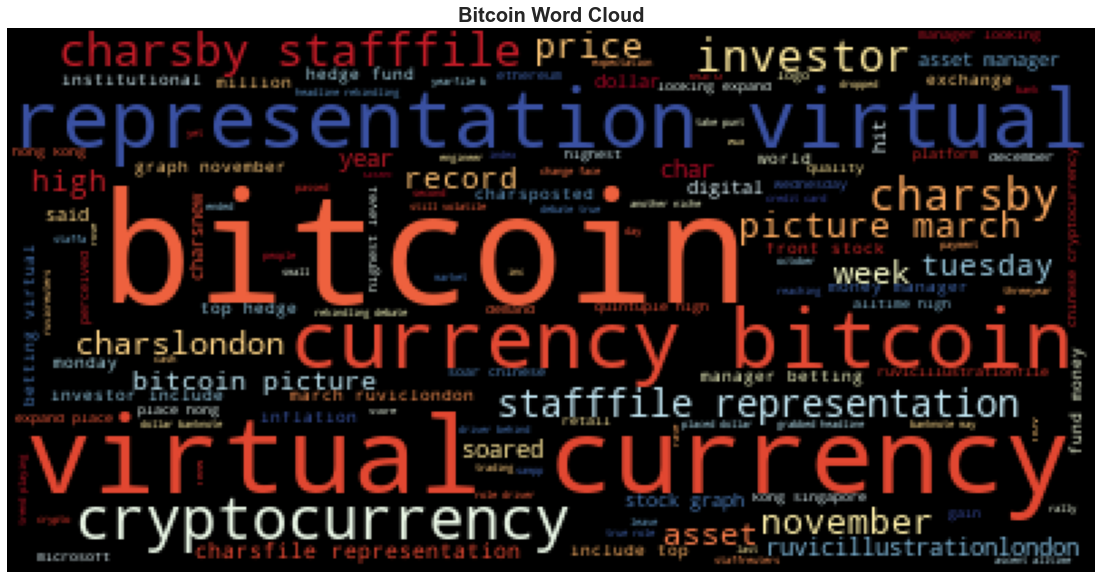

In [23]:
# Generate the Bitcoin word cloud
input_text = process_text(big_string_bitcoin)
wc = WordCloud(colormap="RdYlBu").generate(input_text)
plt.imshow(wc)
plt.imshow(wc)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

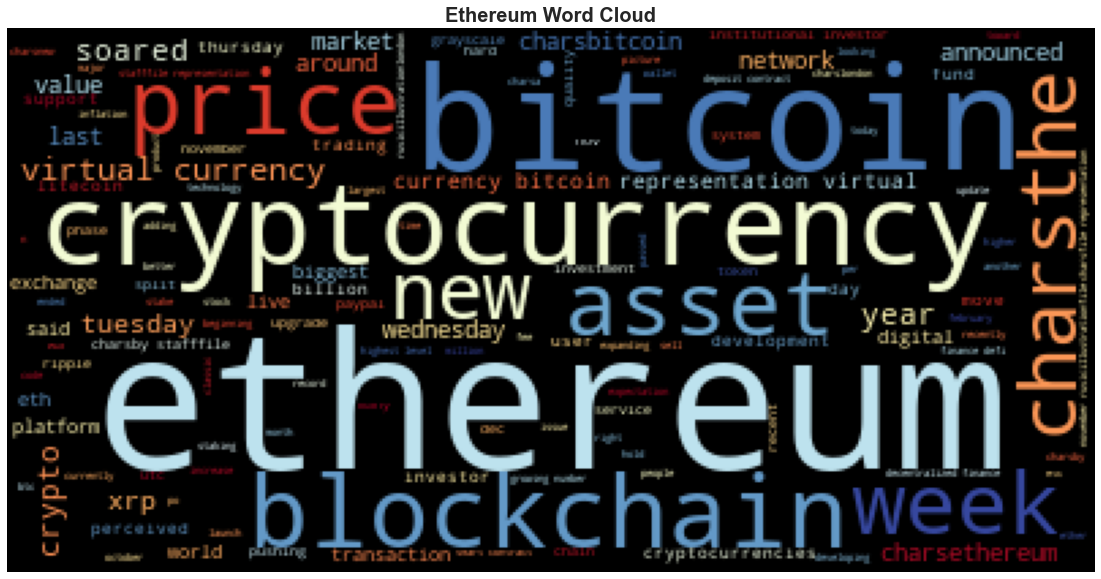

In [24]:
# Generate the Ethereum word cloud
input_text = process_text(big_string_ethereum)
wc = WordCloud(colormap="RdYlBu").generate(input_text)
plt.imshow(wc)
plt.imshow(wc)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [27]:
# Concatenate all of the bitcoin text together
# calling variable previously created 
big_string_bitcoin

"A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the c

In [28]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(big_string_bitcoin)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [30]:
# List all Entities
bitcoin_text = [ent.text for ent in bitcoin_doc.ents]
bitcoin_ents = [ent.label_ for ent in bitcoin_doc.ents]
bitcoin_entities = pd.DataFrame(bitcoin_ents, bitcoin_text)
bitcoin_entities.reset_index(inplace=True)
bitcoin_entities.rename(columns={"index":"Text", 0:"Lables"})

,Text,Lables
0,Microsoft,ORG
1,Ukraine,GPE
2,nine years,DATE
3,more than $10 million,MONEY
4,Microsoft,ORG
...,...,...
470,Visa,ORG
471,Visa,ORG
472,Bitcoin,GPE
473,the Generosity Network,ORG


---

## Ethereum NER

In [31]:
# Concatenate all of the ethereum text together
# calling variable previously created big_string_bitcoin
big_string_ethereum

'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the sec

In [32]:
# Run the NER processor on all of the text
ethereum_doc = nlp(big_string_ethereum)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [34]:
# List all Entities
ethereum_text = [ent.text for ent in ethereum_doc.ents]
ethereum_ents = [ent.label_ for ent in ethereum_doc.ents]
ethereum_entities = pd.DataFrame(ethereum_ents, ethereum_text)
ethereum_entities.reset_index(inplace=True)
ethereum_entities.rename(columns={"index":"Text", 0:"Lables"})

,Text,Lables
0,PayPal,PRODUCT
1,US,GPE
2,first,ORDINAL
3,US,GPE
4,October,DATE
...,...,...
357,ETH,ORG
358,Vitalik Buterin,PERSON
359,Wednesday,DATE
360,today,DATE
